In [10]:
import sys
sys.version

'3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]'

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import ydata_profiling
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

In [12]:
pip list

Package                           Version
--------------------------------- ------------
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
annotated-types                   0.7.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
async-lru                

In [13]:
# 첫 데이터를 로드
df2 = pd.read_excel('./쇼핑몰실습.xlsx')
plt.rc('font', family='Malgun Gothic')
df3 = df2[df2.업체명 != '셀러테스트']
df4 = df2[df2.판매금액 != 0]
df5 = df4.drop(['제작문구 내역', '초도상품', '제조사'], axis=1)#매출 데이터로 활용 예정

#셀러테스트 값 제거, 0원 제거


In [14]:
df5['결제방법'] = df5['결제방법'].replace({    
    "신 + 적": "신용카드" , "신 + 포": "신용카드",
    "신 + 웰컴": "신용카드", "신 + 적 + 포": "신용카드", "-":"기타",
    "현 + 적": "현금", "현 + 포": "현금", "무통장입금":"현금", 
    "현 + 적 + 포": "현금", "가상계좌":"현금", "현금간편결제":"현금",
    "적 + 포": "마일리지","포인트":"마일리지","적립금":"마일리지",
    "웰컴마일":"마일리지"," + 포":"마일리지",
    "정 + 적": "할부", "정 + 적 + 포": "할부", "후불": "할부",
    "정 + 포": "할부", "후 + 적": "할부", "정기결제":"할부",
    "후 + 적 + 포": "할부", "후 + 포": "할부",
    'nan': "기타"})

df5['처리상태'] = df5['처리상태'].replace({
    '교환완료':'결제완료', '구매확정':'결제완료', '배송완료':'결제완료', '배송준비':'결제완료', '배송중':'결제완료',
    '부분취소':'결제완료', '환불완료':'결제완료', '주문취소':'미결제', '부분환불':'결제완료', '상담취소':'미결제',
    '상담형상품접':'미결제', '시안확인요청':'미결제', '':'미결제', '환불승':'결제완료', '환불완':'결제완료',
    '환불요청':'결제완료', '후불반려':'미결제'})

#매출 데이터

C:\Users\User\AppData\Local\Temp\ipykernel_24376\3513240966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['연도월'] = pd.to_datetime(df_filtered['주문일자'], format='%Y/%m').dt.to_period('M')


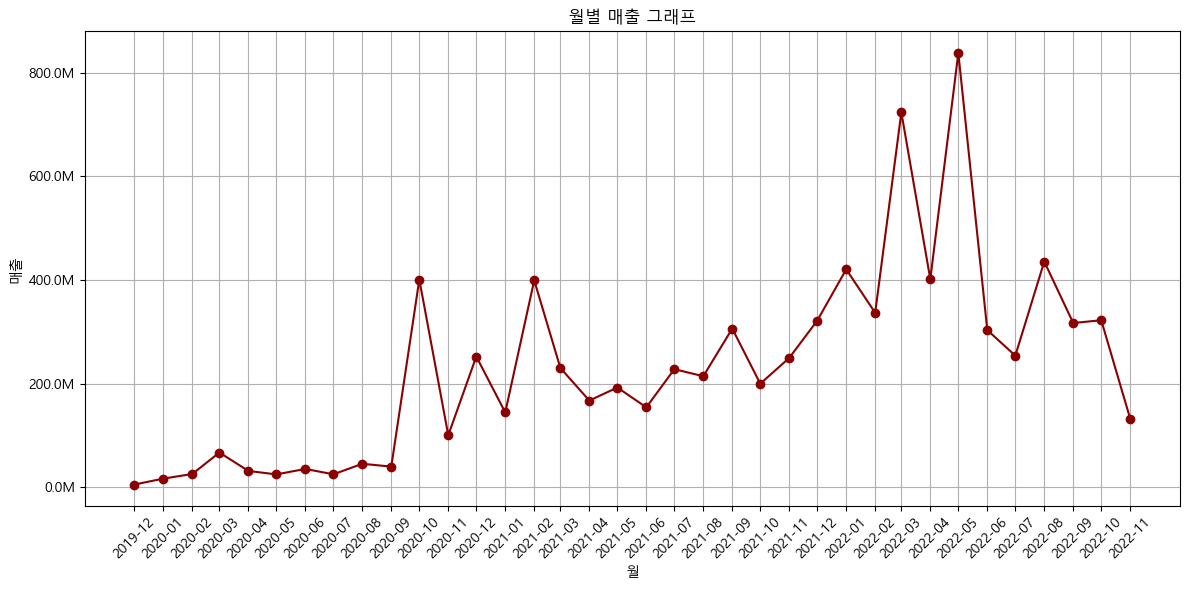

In [15]:
df_filtered = df5[df5['처리상태'] == '결제완료']
# '연도월' 컬럼을 datetime 형식으로 변환
df_filtered['연도월'] = pd.to_datetime(df_filtered['주문일자'], format='%Y/%m').dt.to_period('M')
# 월/년별 판매금액 집계
monthly_sales = df_filtered.groupby('연도월')['판매금액'].sum().reset_index()
# '연도월' 컬럼을 datetime 형식으로 변환하여 시계열 데이터로 사용
monthly_sales['연도월'] = monthly_sales['연도월'].dt.to_timestamp('D')
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
# 그래프 시각화
from matplotlib.dates import DateFormatter
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['연도월'], monthly_sales['판매금액'], marker='o',color='darkred')
plt.title('월별 매출 그래프')
plt.xlabel('월')
plt.ylabel('매출')
plt.xticks(['2019-12','2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12',
 '2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12',
'2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11'],rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
date_formatter = DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.grid(True)
plt.tight_layout()
plt.show()

#월별 매출 그래프

C:\Users\User\AppData\Local\Temp\ipykernel_24376\2504079018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['주문일자'] = pd.to_datetime(df_filtered['주문일자'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_24376\2504079018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['연도'] = df_filtered['주문일자'].dt.year


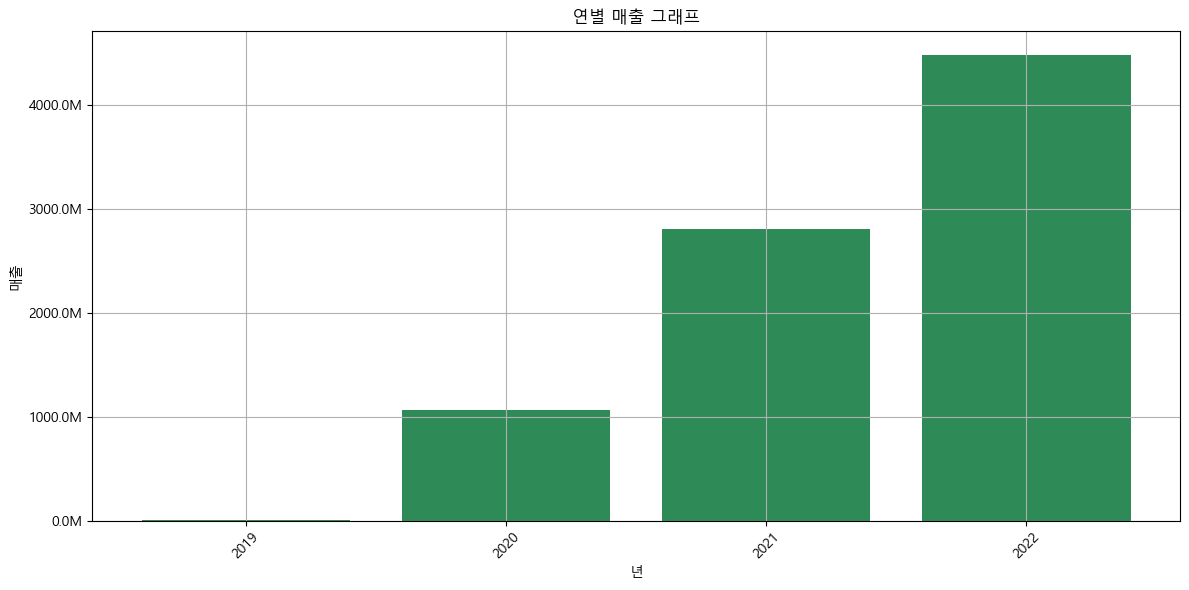

In [16]:
# 데이터 필터링: '결제완료' 상태의 주문만 선택
df_filtered = df5[df5['처리상태'] == '결제완료']

# '주문일자'를 datetime 형식으로 변환 (필요한 경우)
df_filtered['주문일자'] = pd.to_datetime(df_filtered['주문일자'], errors='coerce')

# '연도' 컬럼 생성: '주문일자'에서 연도를 추출
df_filtered['연도'] = df_filtered['주문일자'].dt.year

# 연도별 판매금액 집계
yearly_sales = df_filtered.groupby('연도')['판매금액'].sum().reset_index()

# y축 포맷터 함수 정의: 금액을 백만 단위로 표시
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(yearly_sales['연도'], yearly_sales['판매금액'], color='seagreen')
plt.title('연별 매출 그래프')
plt.xlabel('년')
plt.ylabel('매출')

# x축 레이블 설정
plt.xticks(yearly_sales['연도'], rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)

# x축 포맷을 '연도' 형식으로 설정
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.grid(True)
plt.tight_layout()
plt.show()

#연별 매출그래프

In [17]:
# 할부 기간에 따른 데이터 생성 함수 정의
df6 = df4.drop(['제작문구 내역', '초도상품', '제조사'], axis=1)#순이익 데이터로 활용 예정

def create_installment_rows(row):
    rows = []
    if row['할부기간'] == '6개월':
        months = 6
    elif row['할부기간'] == '12개월':
        months = 12
    elif row['할부기간'] == '18개월':
        months = 18
    elif row['할부기간'] == '24개월':
        months = 24
    else:
        return [row]
    
    installment_amount = row['판매금액'] / months
    order_date = pd.to_datetime(row['주문일자'])
    
    for i in range(months):
        new_row = row.copy()
        new_row['주문일자'] = order_date + pd.DateOffset(months=i)
        new_row['판매금액'] = installment_amount
        new_row['할부개월'] = f"{i+1}/{months}"
        rows.append(new_row)
    
    return rows

# 할부 데이터를 처리하여 각 달로 나누기
installment_rows = []
for idx, row in df6.iterrows():
    installment_rows.extend(create_installment_rows(row))

# 새로운 데이터프레임 생성
installment_df = pd.DataFrame(installment_rows)

# 월별 매출 계산
installment_df['연도월'] = installment_df['주문일자'].dt.to_period('M')
installment_df['연도월'] = installment_df['연도월'].astype(str)
monthly_sales = installment_df.groupby('연도월')['판매금액'].sum().reset_index()

# 연도별 매출 계산
installment_df['연도'] = installment_df['주문일자'].dt.year
yearly_sales = installment_df.groupby('연도')['판매금액'].sum().reset_index()

# y축 값 포맷터 함수 정의 (백만 단위)
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

# 엑셀 파일 생성
wb = Workbook()

# 기본 시트 제거
default_sheet = wb.active
wb.remove(default_sheet)

# 할부 처리 데이터 시트
ws1 = wb.create_sheet(title='할부처리데이터')
for r in dataframe_to_rows(installment_df, index=False, header=True):
    ws1.append(r)

#원본데이터 / 건드리지않음 할부 데이터

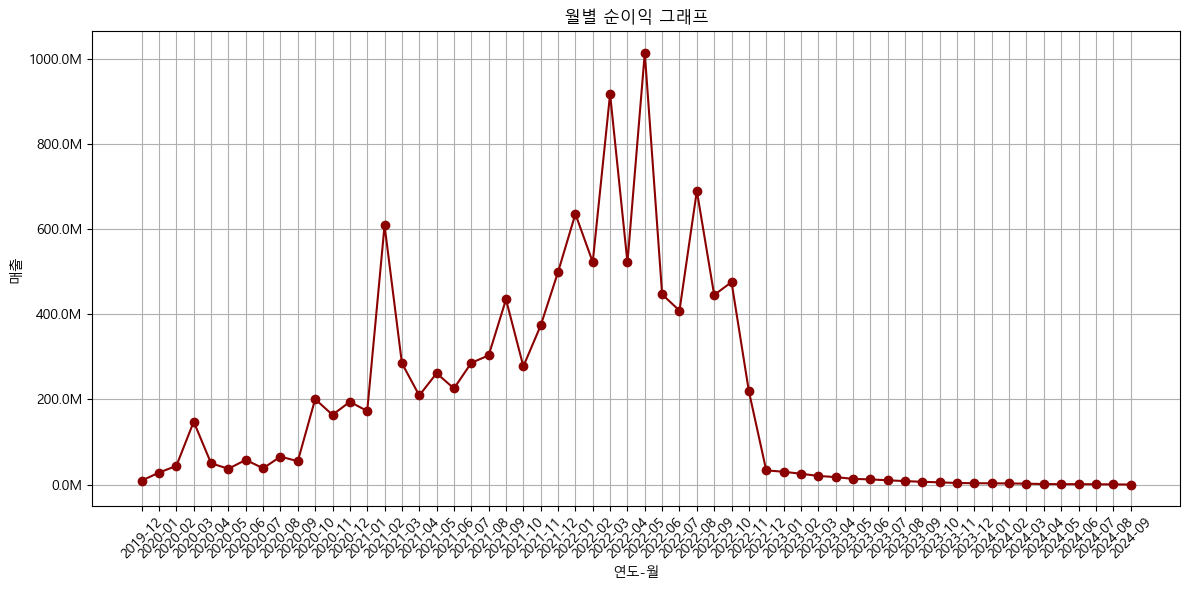

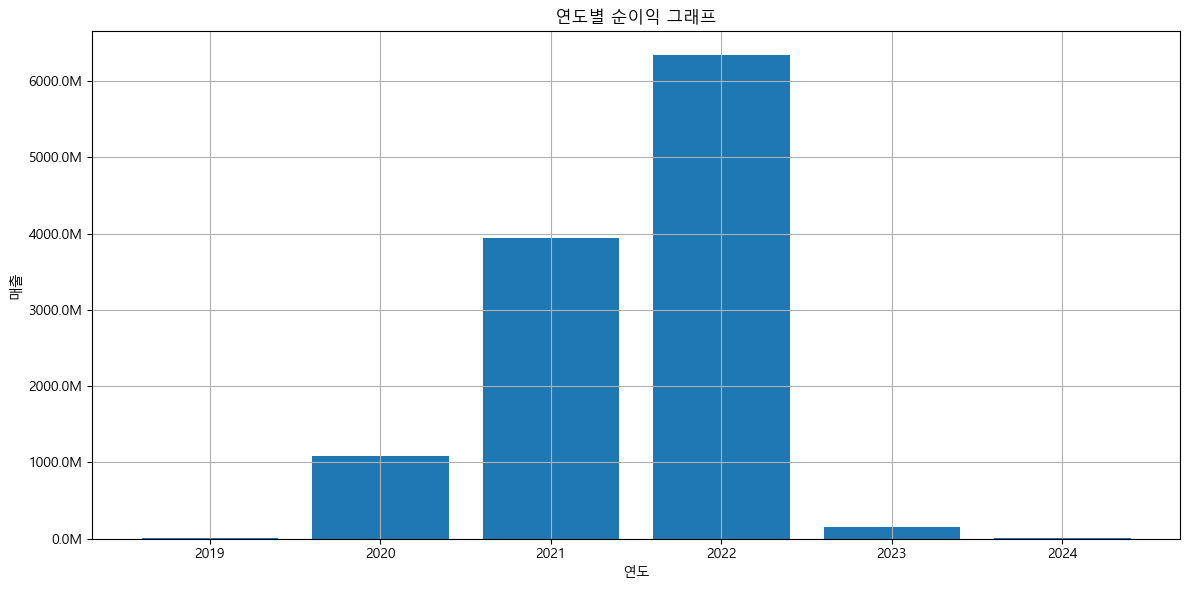

In [18]:
# 순이익 처리
df6['결제방법'] = df6['결제방법'].replace({    
    "신 + 적": "신용카드" , "신 + 포": "신용카드",
    "신 + 웰컴": "신용카드", "신 + 적 + 포": "신용카드", "-":"기타",
    "현 + 적": "현금", "현 + 포": "현금", "무통장입금":"현금", 
    "현 + 적 + 포": "현금", "가상계좌":"현금", "현금간편결제":"현금",
    "적 + 포": "마일리지","포인트":"마일리지","적립금":"마일리지",
    "웰컴마일":"마일리지"," + 포":"마일리지",
    "정 + 적": "할부", "정 + 적 + 포": "할부", "후불": "할부",
    "정 + 포": "할부", "후 + 적": "할부", "정기결제":"할부",
    "후 + 적 + 포": "할부", "후 + 포": "할부",
    'nan': "기타"})

df6['처리상태'] = df6['처리상태'].replace({
    '교환완료':'미결제', '구매확정':'결제완료', '배송완료':'미결제', '배송준비':'미결제', '배송중':'미결제',
    '부분취소':'미결제', '환불완료':'미결제', '주문취소':'미결제', '부분환불':'미결제', '상담취소':'미결제',
    '상담형상품접':'미결제', '시안확인요청':'미결제', '':'미결제', '환불승':'미결제', '환불완':'미결제',
    '환불요청':'미결제', '후불반려':'미결제'})


# 새로운 데이터프레임 생성
installment_df = pd.DataFrame(installment_rows)

# 월별 매출 계산
installment_df['연도월'] = installment_df['주문일자'].dt.to_period('M')
installment_df['연도월'] = installment_df['연도월'].astype(str)
monthly_sales = installment_df.groupby('연도월')['판매금액'].sum().reset_index()

# 연도별 매출 계산
installment_df['연도'] = installment_df['주문일자'].dt.year
yearly_sales = installment_df.groupby('연도')['판매금액'].sum().reset_index()

# y축 값 포맷터 함수 정의 (백만 단위)
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# 월별 매출 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['연도월'], monthly_sales['판매금액'], marker='o',color='darkred')
plt.title('월별 순이익 그래프')
plt.xlabel('연도-월')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.tight_layout()


# 그래프를 이미지로 저장
monthly_graph_image_path = './monthly_sales_graph.png'
plt.savefig(monthly_graph_image_path)
plt.show()

# 연도별 매출 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(yearly_sales['연도'].astype(str), yearly_sales['판매금액'])
plt.title('연도별 순이익 그래프')
plt.xlabel('연도')
plt.ylabel('매출')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.tight_layout()

# 그래프를 이미지로 저장
yearly_graph_image_path = './yearly_sales_graph.png'
plt.savefig(yearly_graph_image_path)
plt.show()


In [19]:
# RFM 분석을 위한 데이터 준비
df_rfm = df5.groupby('업체명').agg({
    '주문일자': lambda x: (pd.Timestamp.today() - x.max()).days,  # Recency: 최근 구매일로부터 경과한 일수
    '주문번호': 'count',  # Frequency: 구매 횟수
    '판매금액': 'sum'  # Monetary: 총 구매 금액
})
df_rfm.columns = ['Recency', 'Frequency', 'Monetary']
# RFM 스코어 계산
quantiles = df_rfm.quantile(q=[0.33, 0.66])
def r_score(x):
    if x <= quantiles['Recency'][0.33]:
        return 3
    elif x <= quantiles['Recency'][0.66]:
        return 2
    else:
        return 1
def fm_score(x, c):
    if x <= quantiles[c][0.33]:
        return 1
    elif x <= quantiles[c][0.66]:
        return 2
    else:
        return 3
df_rfm['R'] = df_rfm['Recency'].apply(r_score)
df_rfm['F'] = df_rfm['Frequency'].apply(fm_score, args=('Frequency',))
df_rfm['M'] = df_rfm['Monetary'].apply(fm_score, args=('Monetary',))
# RFM 스코어 합산
df_rfm['RFM_Score'] = df_rfm['R'] + df_rfm['F'] + df_rfm['M']
# 그룹 나누기
def rfm_group(score):
    if score >= 9:
        return '고객 가치가 높음'
    elif score >= 6:
        return '중간 그룹'
    else:
        return '저가 그룹'
df_rfm['RFM_Group'] = df_rfm['RFM_Score'].apply(rfm_group)
# RFM 값을 높은 순으로 정렬
df_rfm_sorted = df_rfm.sort_values(by='RFM_Score', ascending=False)
# 엑셀 파일로 저장
df_rfm_sorted.to_excel('rfm_sorted.xlsx', index=True)
print("RFM 값을 높은 순으로 정렬한 데이터가 'rrfm_sorted.xlsx' 파일로 저장되었습니다.")

RFM 값을 높은 순으로 정렬한 데이터가 'rrfm_sorted.xlsx' 파일로 저장되었습니다.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


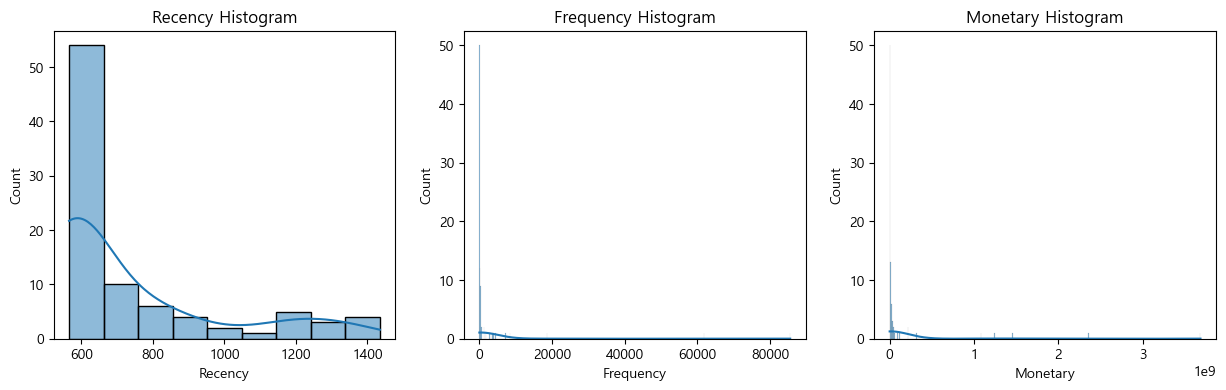

In [20]:
fig, axs = plt.subplots(1,3, figsize=(15,4))

sns.histplot(df_rfm['Recency'], kde=True, ax=axs[0])
axs[0].set_title('Recency Histogram')

sns.histplot(df_rfm['Frequency'], kde=True, ax=axs[1])
axs[1].set_title('Frequency Histogram')

sns.histplot(df_rfm['Monetary'], kde=True, ax=axs[2])
axs[2].set_title('Monetary Histogram')

plt.show()


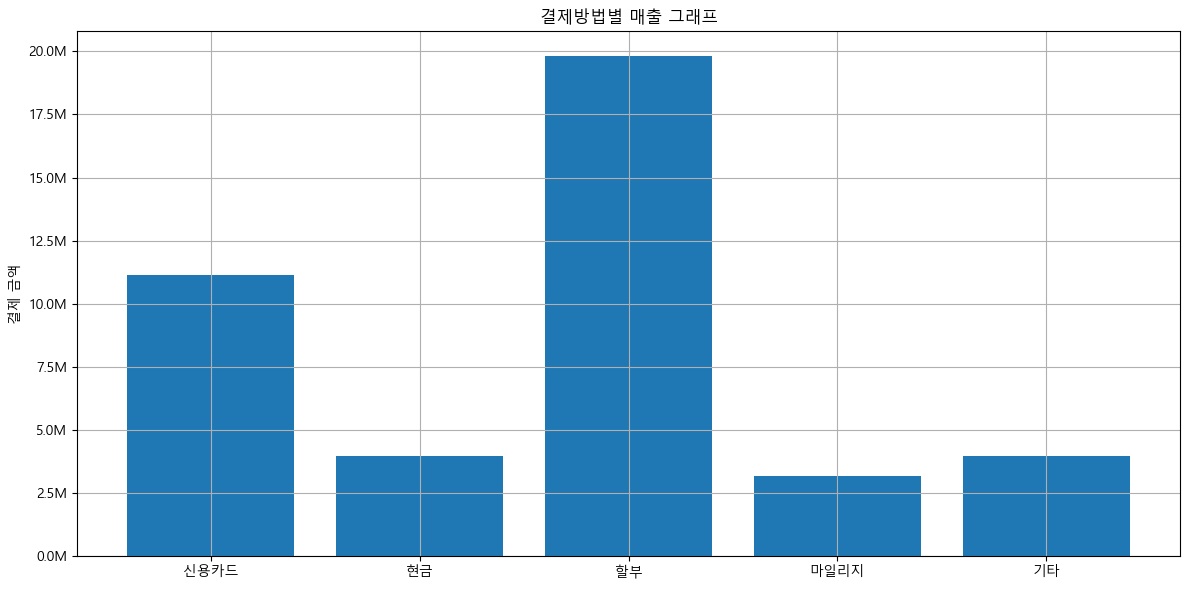

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(df6['결제방법'].astype(str).replace('nan', '기타'), df6['판매금액'])
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
plt.ylabel('결제 금액')
plt.title('결제방법별 매출 그래프')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


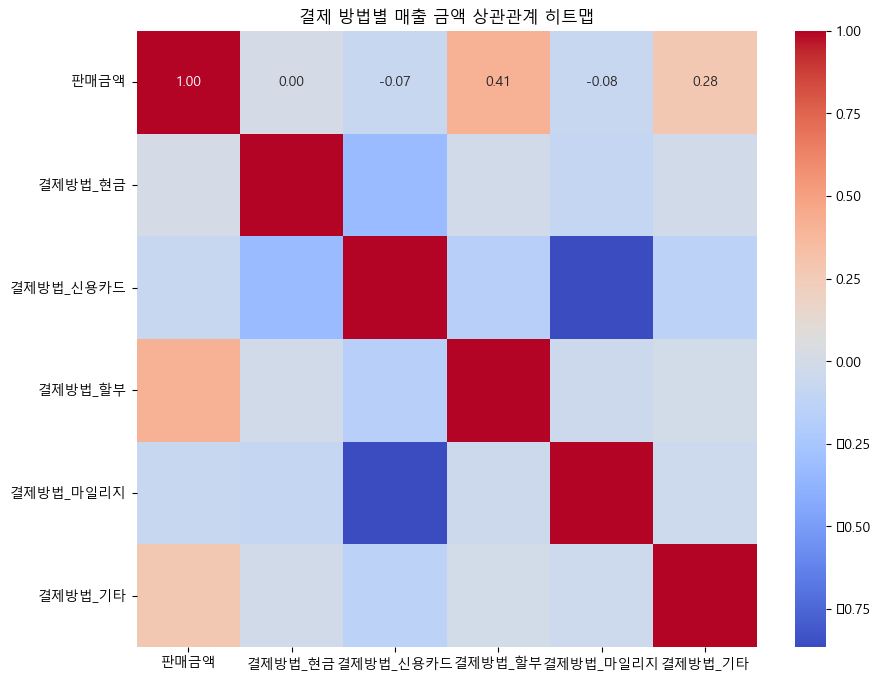

In [27]:
corr = df7[['판매금액', '결제방법_현금', '결제방법_신용카드', '결제방법_할부', '결제방법_마일리지', '결제방법_기타']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('결제 방법별 매출 금액 상관관계 히트맵')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_24376\1270942996.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='결제방법', y='판매금액', data=df6, estimator=np.mean, ci='sd')


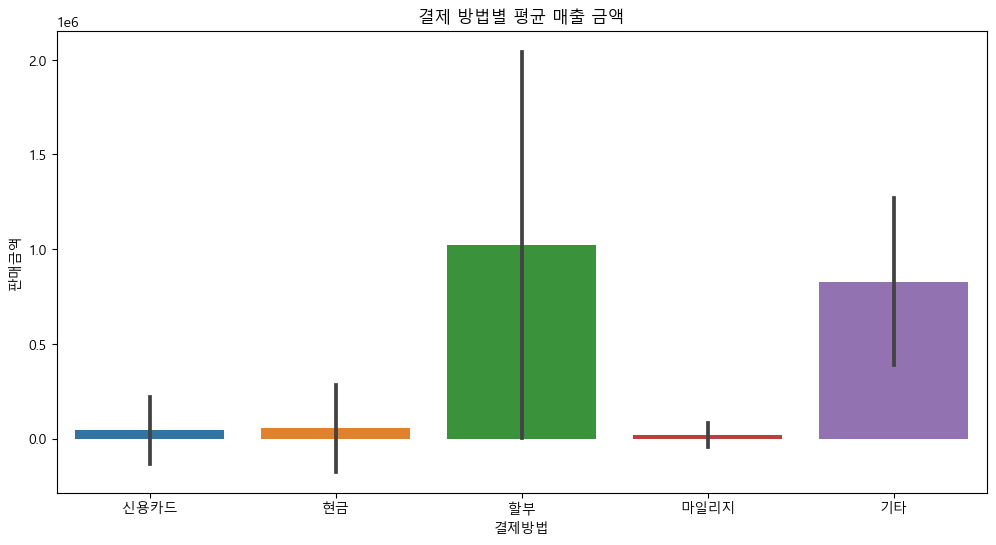

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='결제방법', y='판매금액', data=df6, estimator=np.mean, ci='sd')
plt.title('결제 방법별 평균 매출 금액')
plt.show()


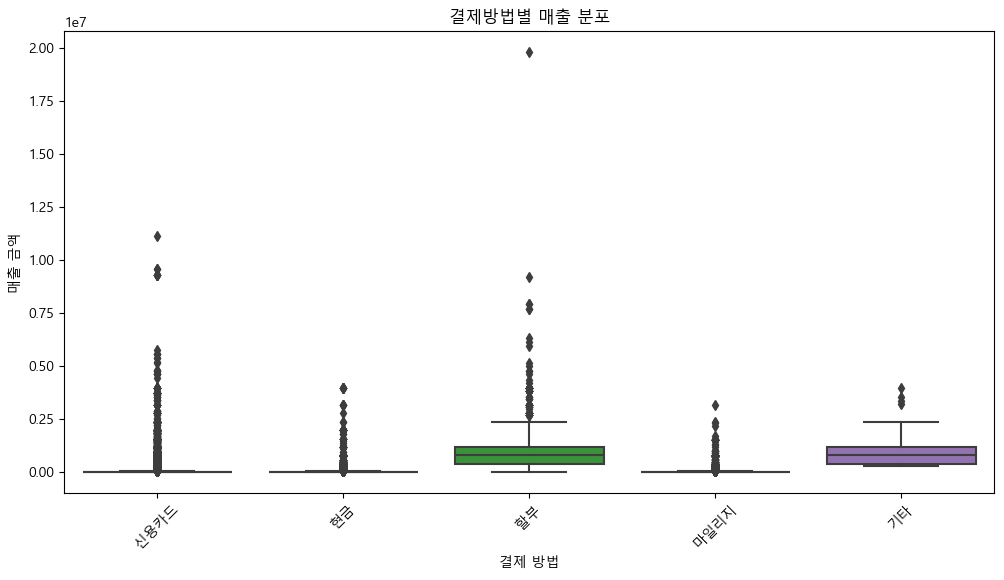

         count          mean           std       min       25%       50%  \
결제방법                                                                       
기타      1361.0  8.286886e+05  4.431030e+05  300000.0  396000.0  792000.0   
마일리지   41839.0  1.856433e+04  6.168821e+04     100.0    3500.0    6160.0   
신용카드  166021.0  4.354668e+04  1.758877e+05      60.0    3780.0   10000.0   
할부      1938.0  1.022380e+06  1.021164e+06     600.0  396000.0  792000.0   
현금      7396.0  5.522850e+04  2.298479e+05     100.0    4000.0    9600.0   

            75%         max  
결제방법                         
기타    1188000.0   3960000.0  
마일리지    20000.0   3168000.0  
신용카드    27900.0  11130000.0  
할부    1188000.0  19800000.0  
현금      26137.5   3960000.0  
                sum_sq        df             F  PR(>F)
C(결제방법)   2.704508e+15       4.0  18533.853694     0.0
Residual  7.972845e+15  218550.0           NaN     NaN
Chi2: 181207.88236942815, p-value: 0.0


In [23]:
# 결제 방법과 매출 데이터를 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x='결제방법', y='판매금액', data=df6)
plt.title('결제방법별 매출 분포')
plt.ylabel('매출 금액')
plt.xlabel('결제 방법')
plt.xticks(rotation=45)
plt.show()

# 기초 통계량 확인
summary_stats = df6.groupby('결제방법')['판매금액'].describe()
print(summary_stats)

# ANOVA 분석
model = ols('판매금액 ~ C(결제방법)', data=df6).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 카이제곱 검정
contingency_table = pd.crosstab(df6['결제방법'], df6['판매금액'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')


Index(['주문번호', '업체명', '상품명', '주문수량', '판매금액', '결제방법', '주문일자', '처리상태', '할부기간'], dtype='object')


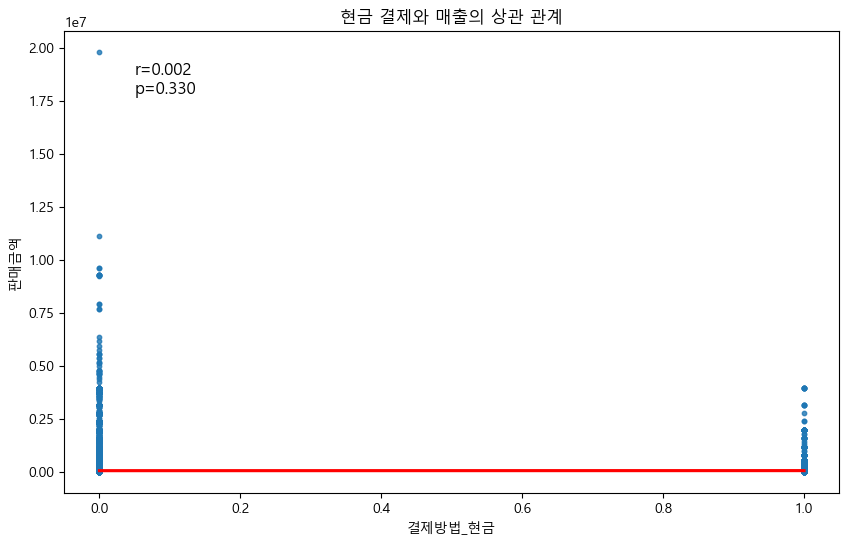

<Figure size 640x480 with 0 Axes>

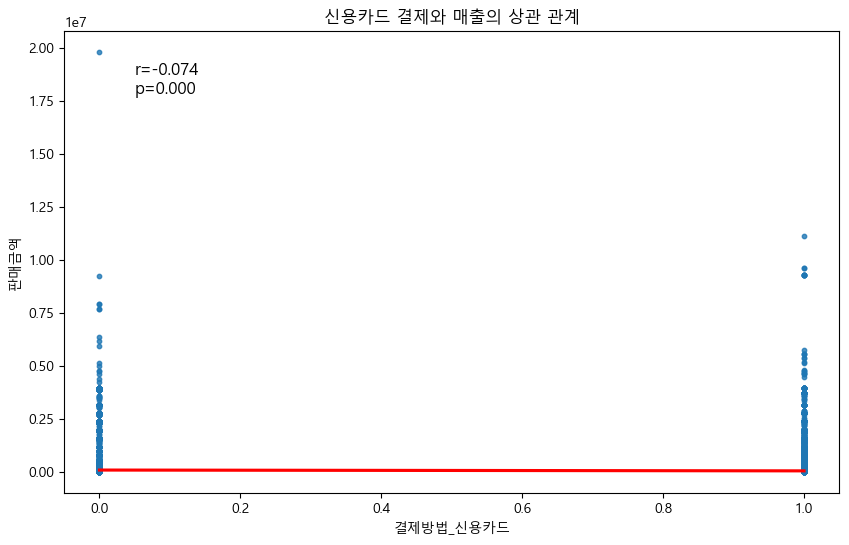

<Figure size 640x480 with 0 Axes>

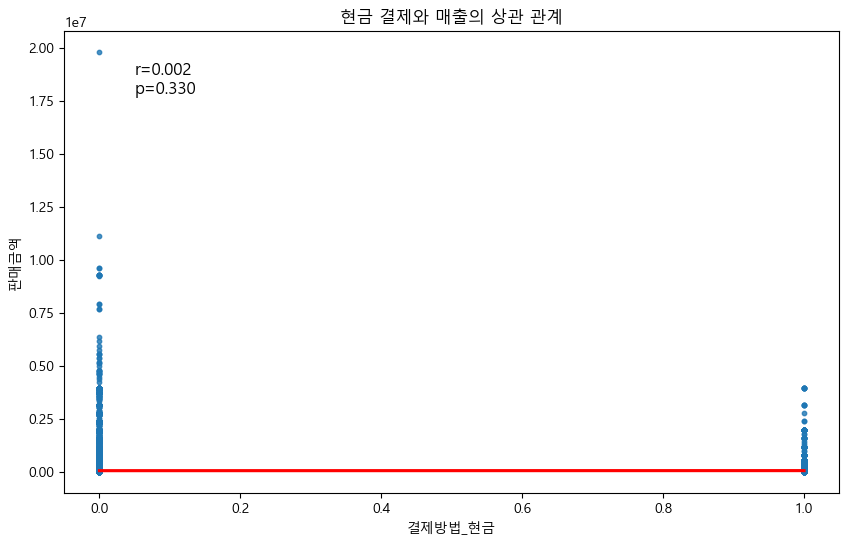

<Figure size 640x480 with 0 Axes>

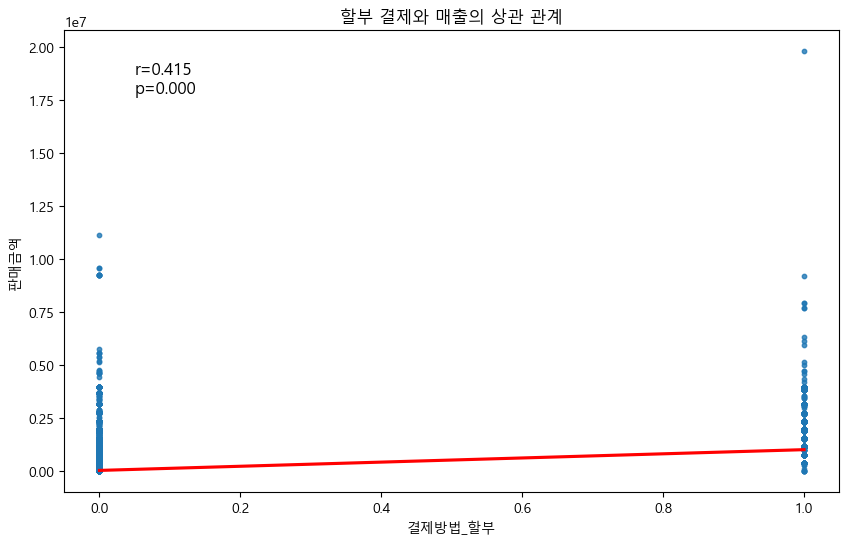

<Figure size 640x480 with 0 Axes>

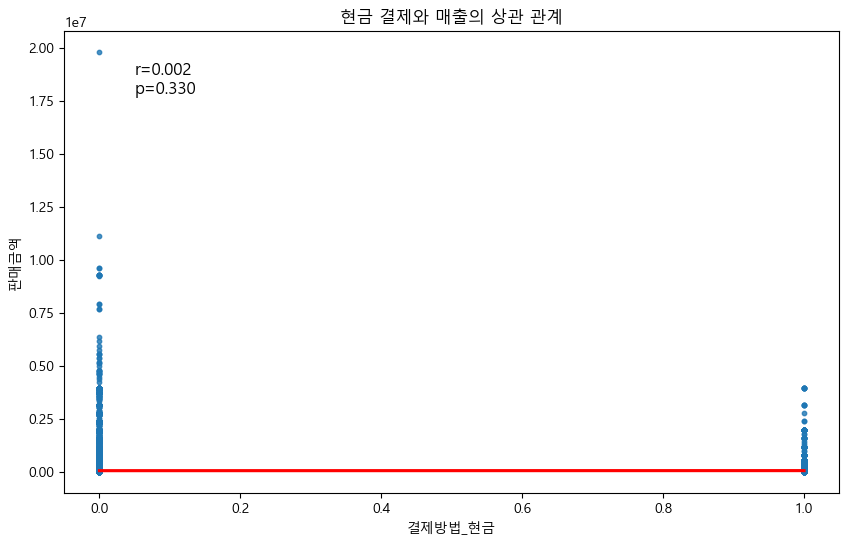

<Figure size 640x480 with 0 Axes>

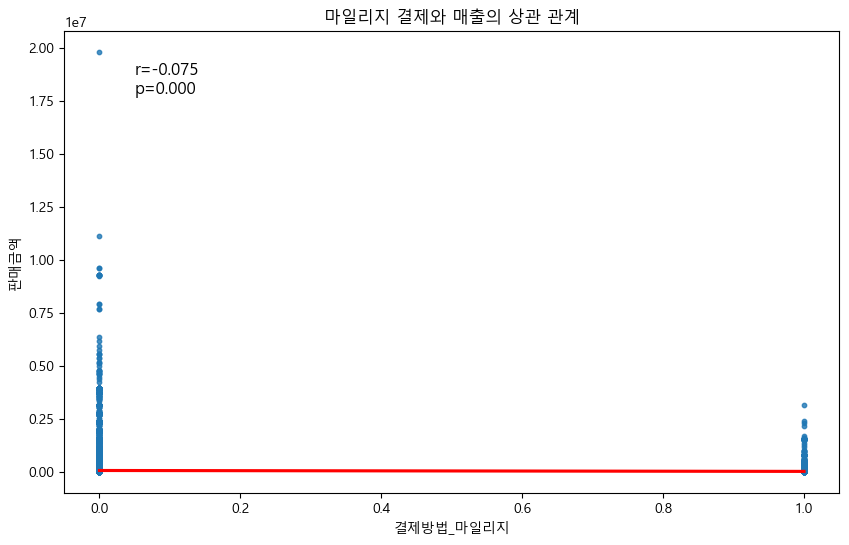

<Figure size 640x480 with 0 Axes>

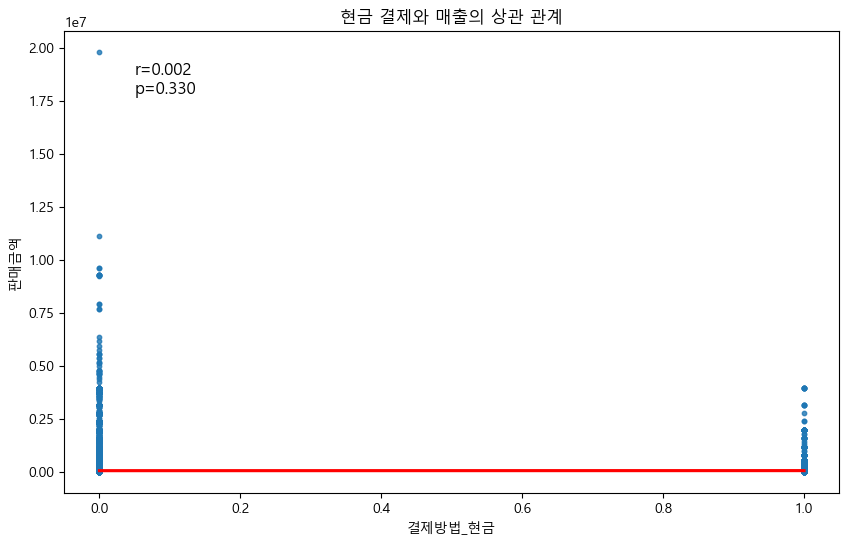

<Figure size 640x480 with 0 Axes>

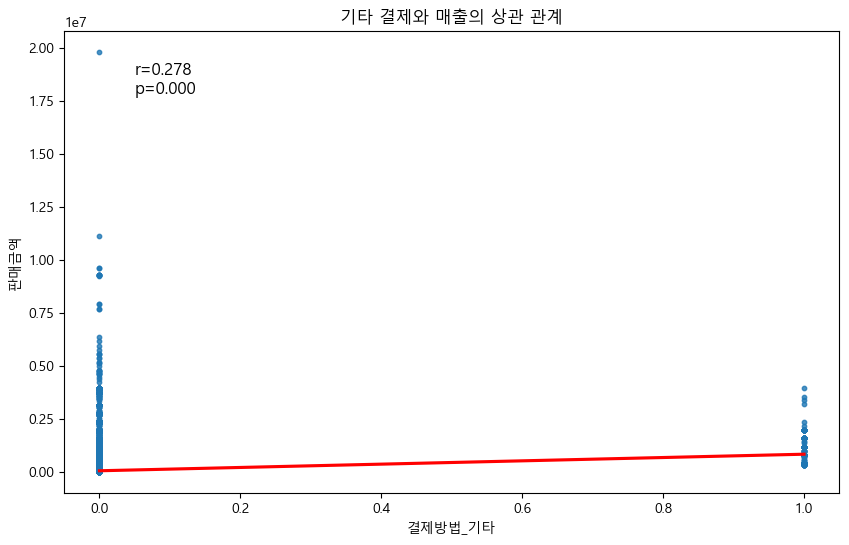

<Figure size 640x480 with 0 Axes>

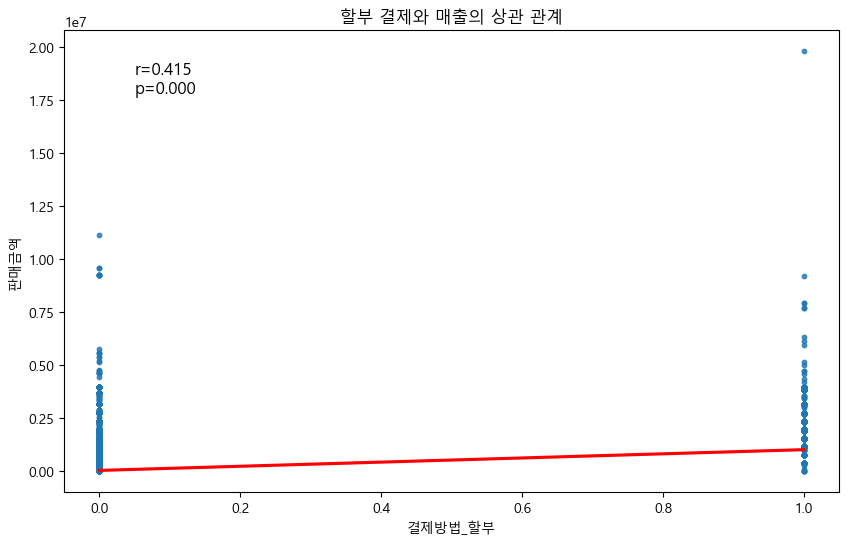

<Figure size 640x480 with 0 Axes>

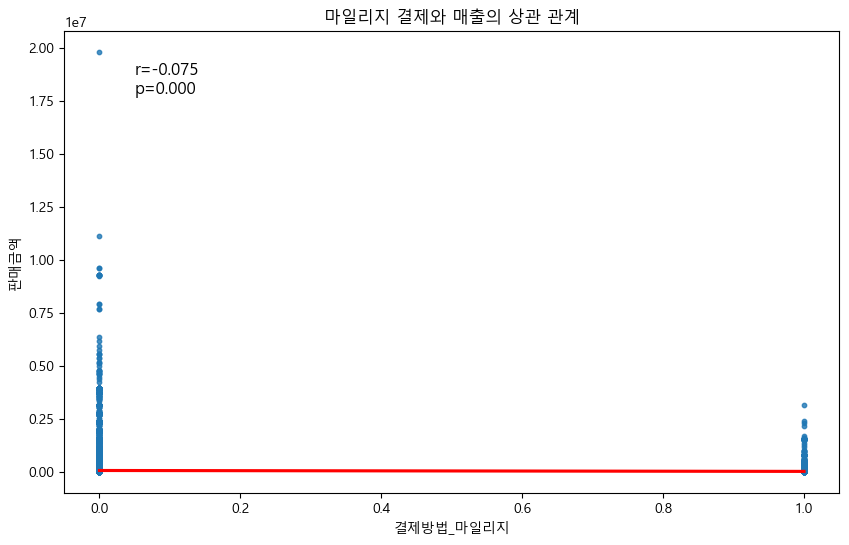

<Figure size 640x480 with 0 Axes>

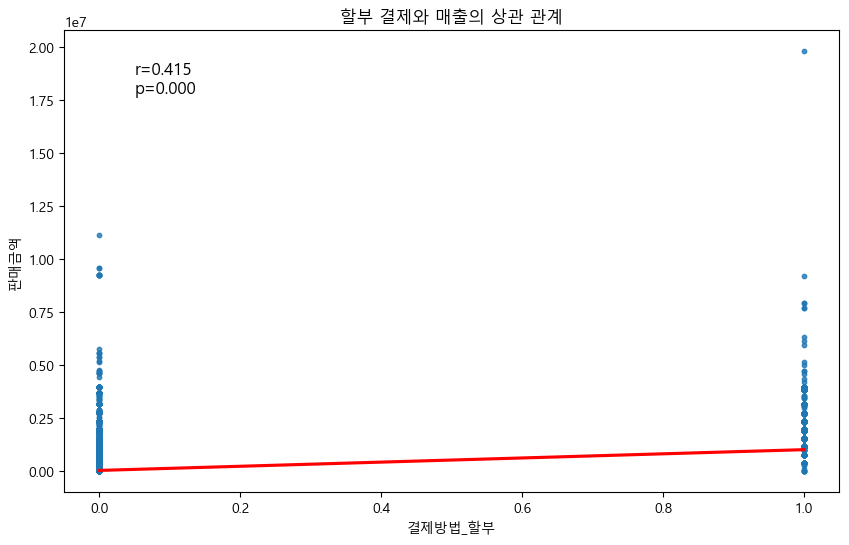

<Figure size 640x480 with 0 Axes>

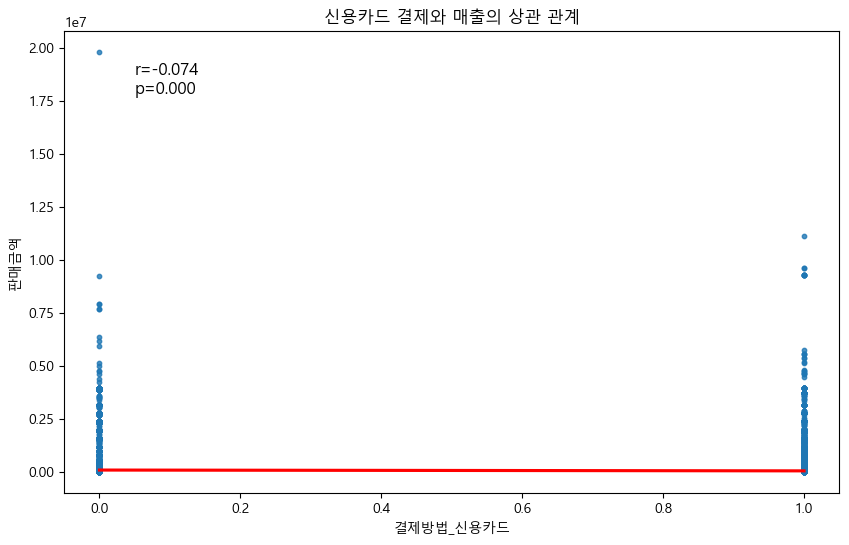

<Figure size 640x480 with 0 Axes>

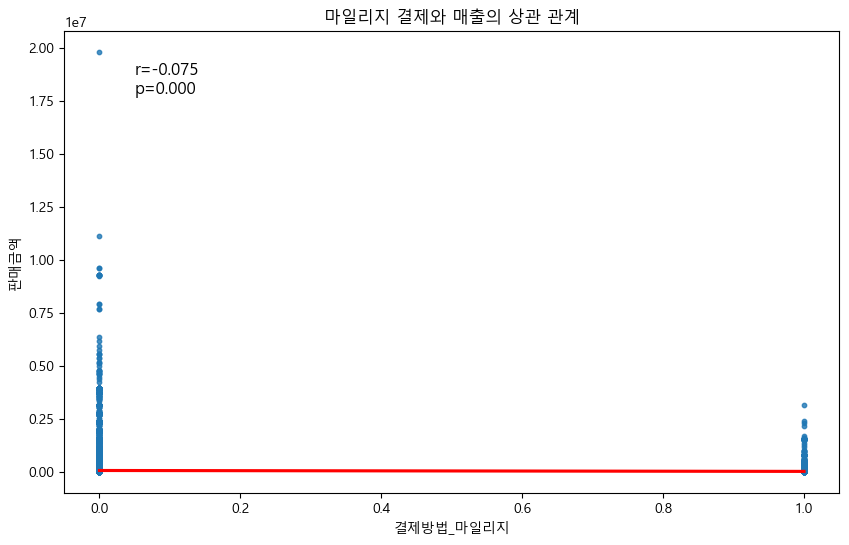

<Figure size 640x480 with 0 Axes>

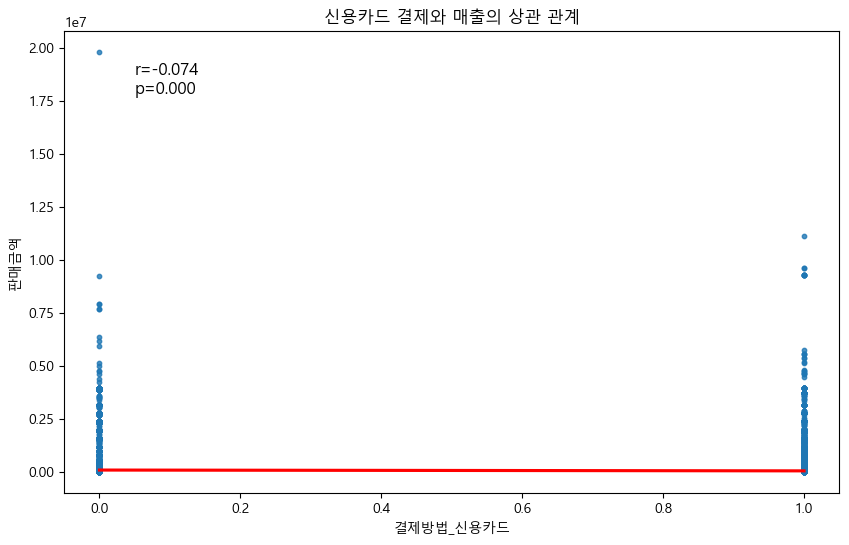

<Figure size 640x480 with 0 Axes>

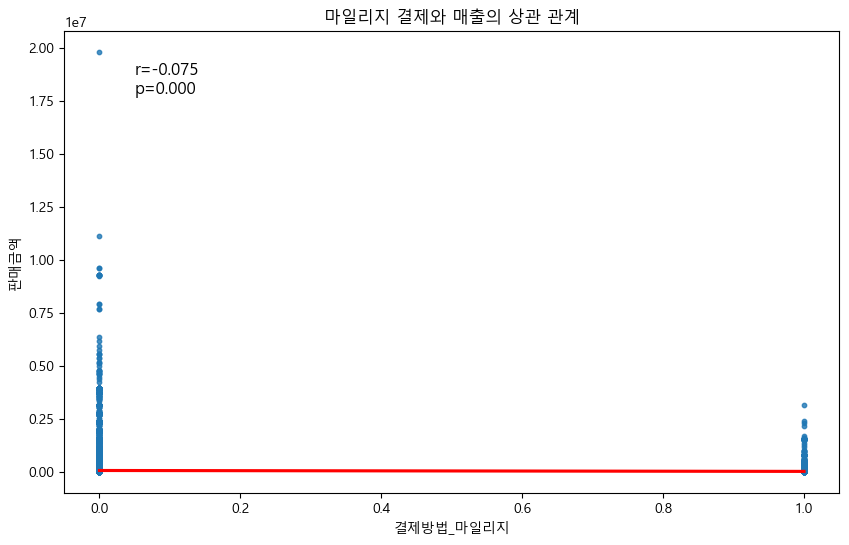

<Figure size 640x480 with 0 Axes>

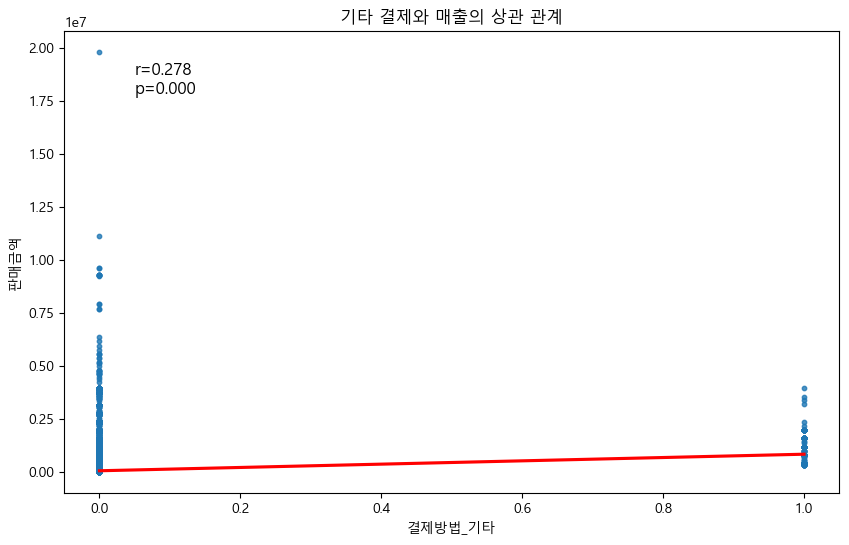

<Figure size 640x480 with 0 Axes>

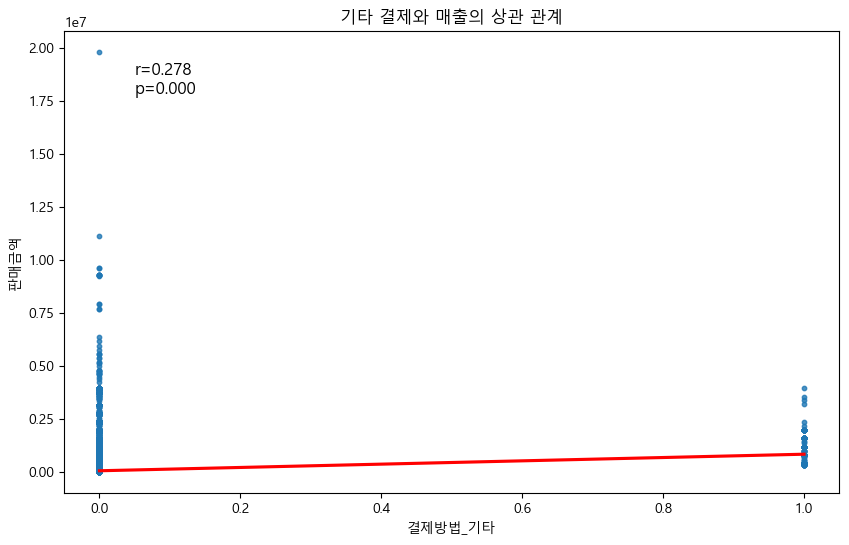

<Figure size 640x480 with 0 Axes>

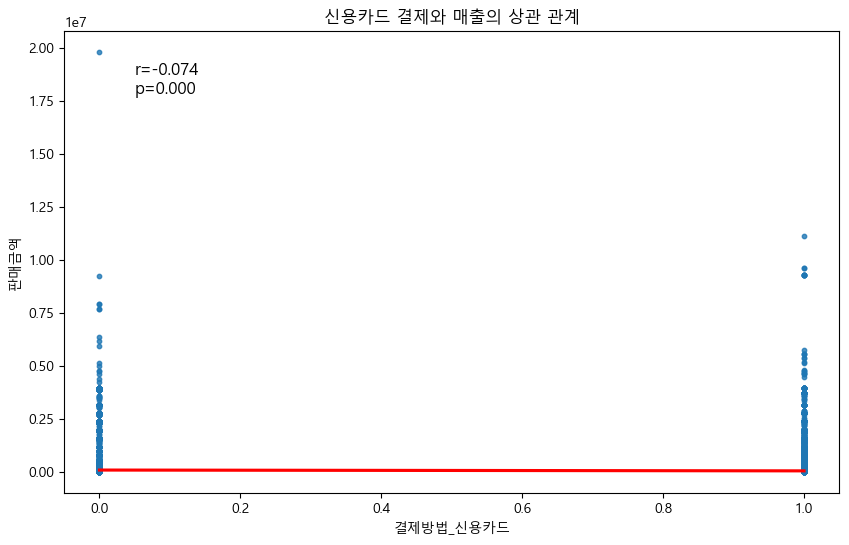

<Figure size 640x480 with 0 Axes>

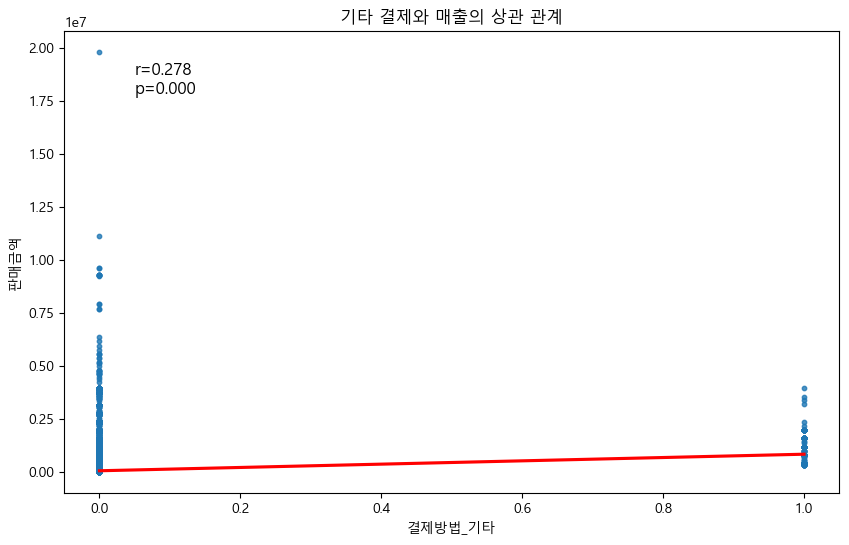

<Figure size 640x480 with 0 Axes>

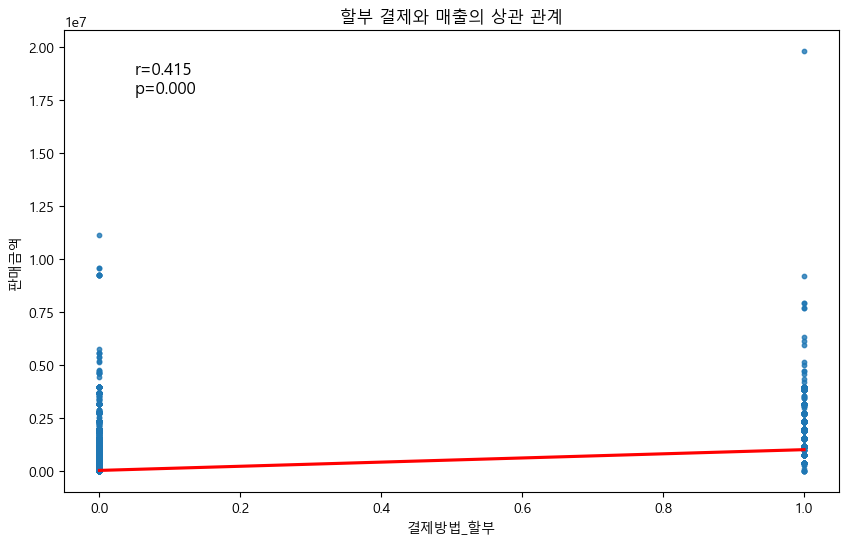

<Figure size 640x480 with 0 Axes>

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 데이터프레임의 컬럼명 확인
print(df6.columns)

# 결제 방법을 숫자로 변환 (더미 변수 사용)
df8 = pd.get_dummies(df6, columns=['결제방법'], drop_first=False)

# 회귀선 플롯을 그리는 함수
def plot_regression(data, x_col, y_col, title):
    r, p = stats.pearsonr(data[x_col], data[y_col])
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x_col, y=y_col, data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.text(data[x_col].min() + 0.05, data[y_col].max() * 0.9, 'r=%0.3f\np=%0.3f' % (r, p), fontsize=12)
    plt.show()

# 결제 방법 간의 쌍에 대해 회귀선 플롯을 생성하고 저장
payment_methods = ['현금', '신용카드', '할부', '마일리지', '기타']
combinations = [
    ('현금', '신용카드'),
    ('현금', '할부'),
    ('현금', '마일리지'),
    ('현금', '기타'),
    ('할부', '마일리지'),
    ('할부', '신용카드'),
    ('마일리지', '신용카드'),
    ('마일리지', '기타'),
    ('기타', '신용카드'),
    ('기타', '할부')
]

for method1, method2 in combinations:
    col1 = f'결제방법_{method1}'
    col2 = f'결제방법_{method2}'
    if col1 in df8.columns and col2 in df8.columns:
        plot_regression(df8, col1, '판매금액', f'{method1} 결제와 매출의 상관 관계')
        plt.savefig(f'{method1} 결제와 매출의 상관 관계.png')
        plot_regression(df8, col2, '판매금액', f'{method2} 결제와 매출의 상관 관계')
        plt.savefig(f'{method2} 결제와 매출의 상관 관계.png')


In [25]:
print(df8.columns)

Index(['주문번호', '업체명', '상품명', '주문수량', '판매금액', '주문일자', '처리상태', '할부기간', '결제방법_기타',
       '결제방법_마일리지', '결제방법_신용카드', '결제방법_할부', '결제방법_현금'],
      dtype='object')


Index(['주문번호', '업체명', '상품명', '주문수량', '판매금액', '결제방법', '주문일자', '처리상태', '할부기간'], dtype='object')


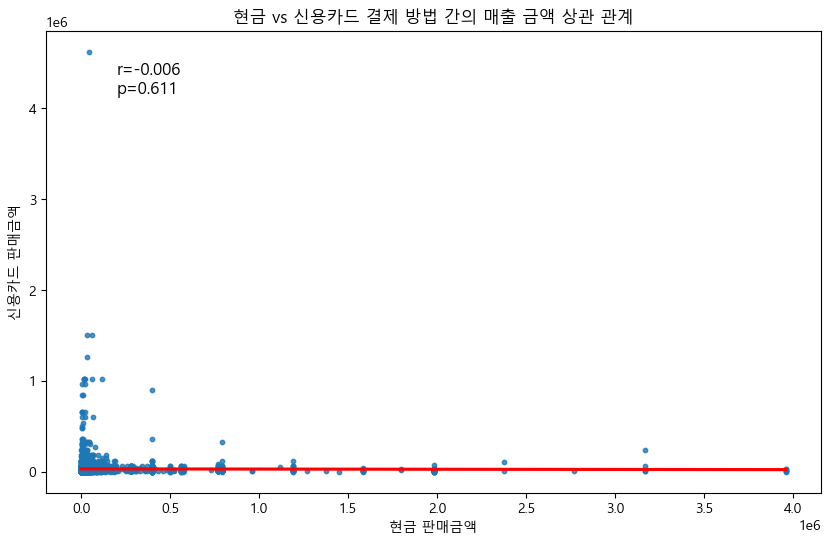

<Figure size 640x480 with 0 Axes>

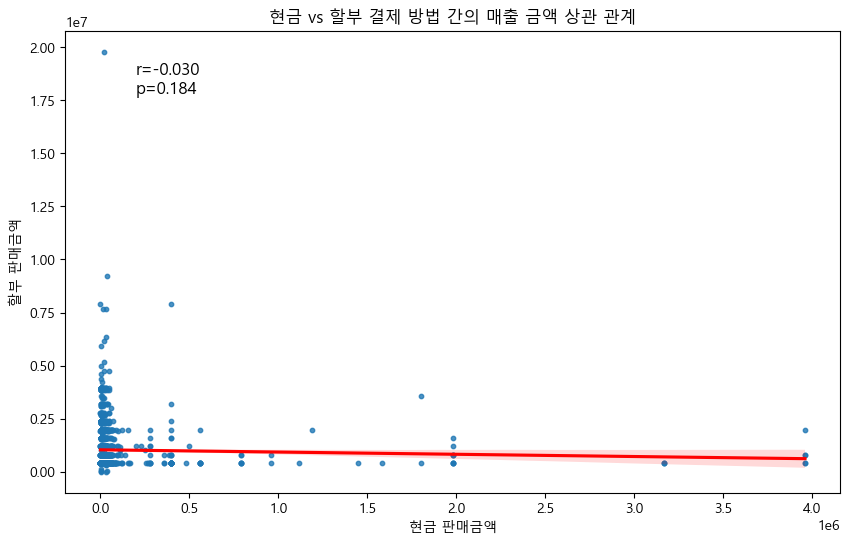

<Figure size 640x480 with 0 Axes>

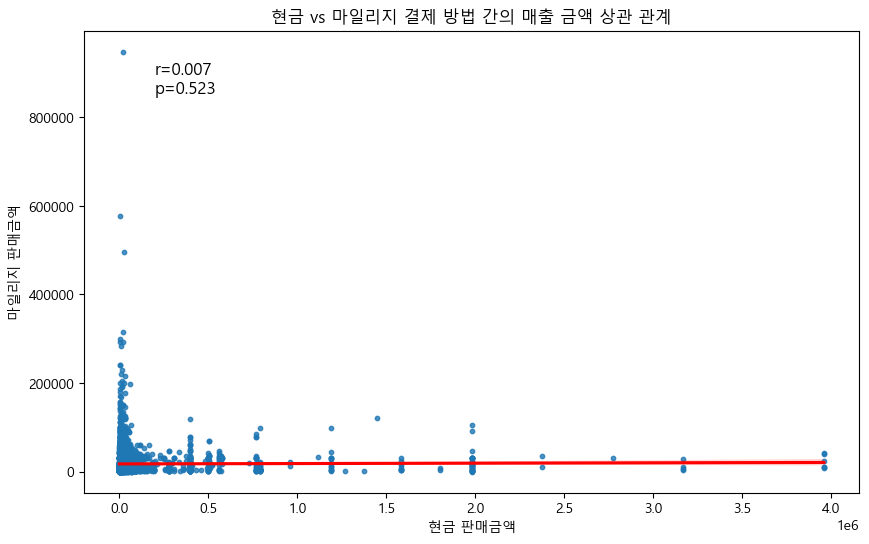

<Figure size 640x480 with 0 Axes>

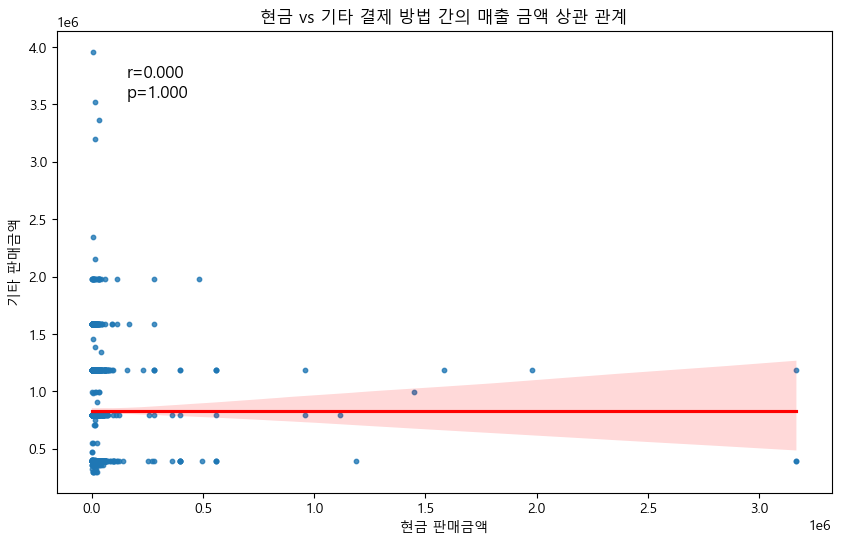

<Figure size 640x480 with 0 Axes>

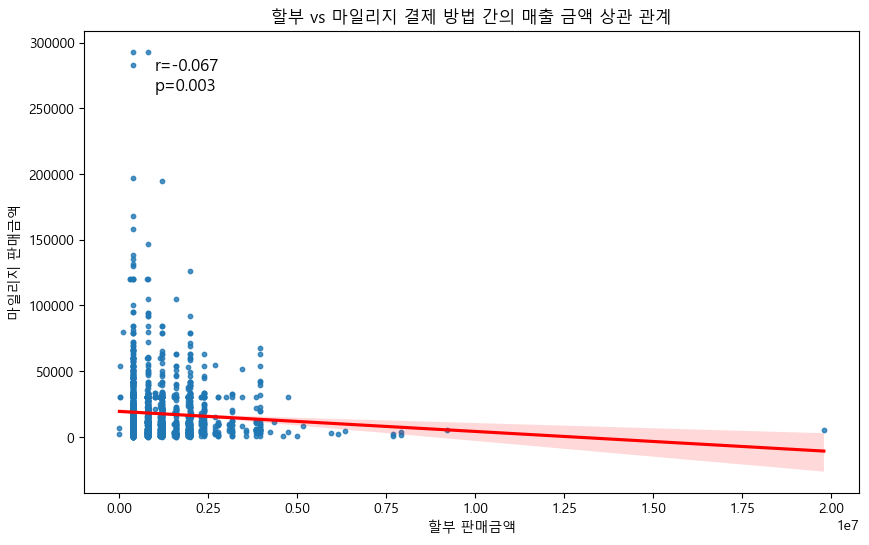

<Figure size 640x480 with 0 Axes>

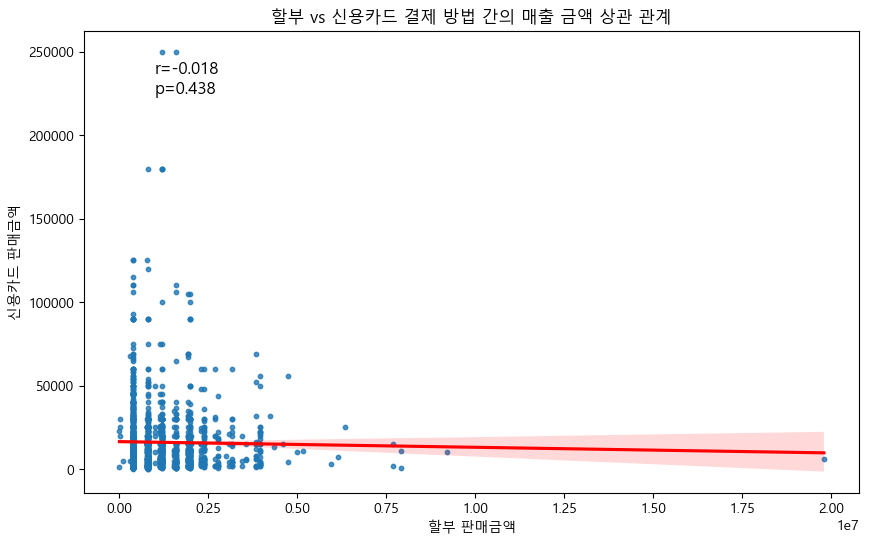

<Figure size 640x480 with 0 Axes>

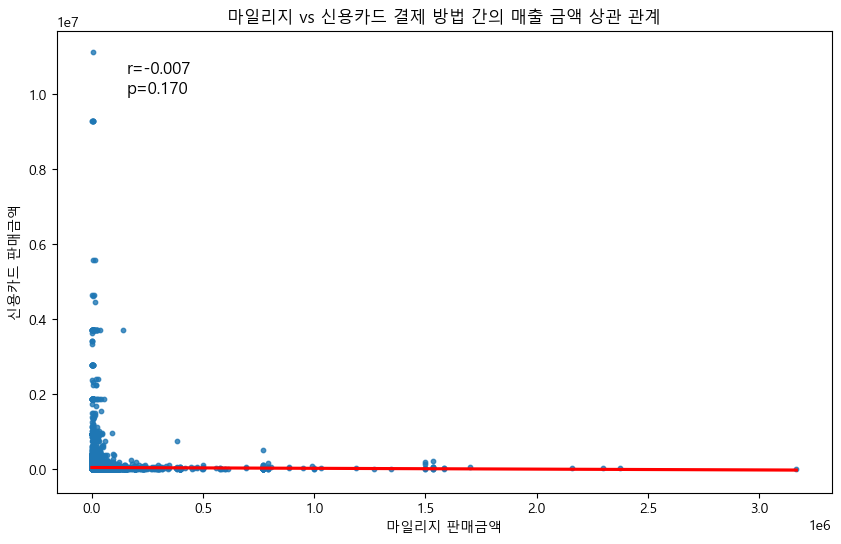

<Figure size 640x480 with 0 Axes>

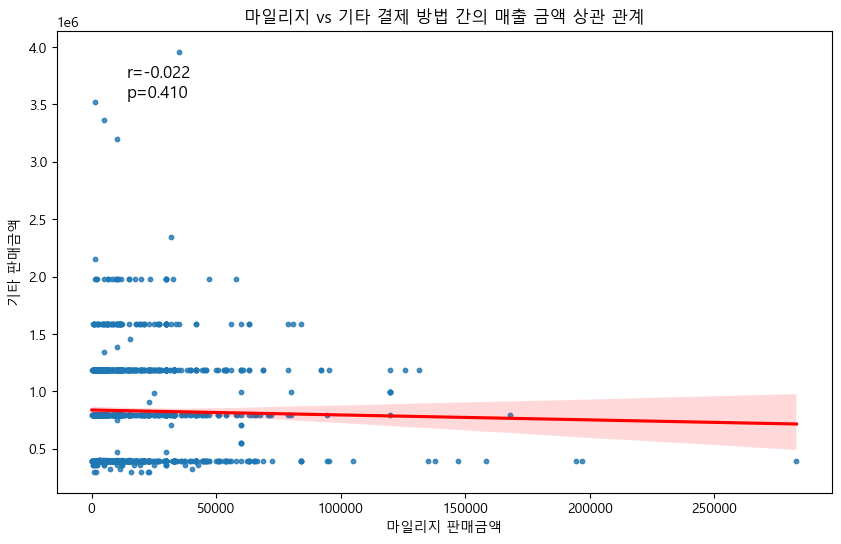

<Figure size 640x480 with 0 Axes>

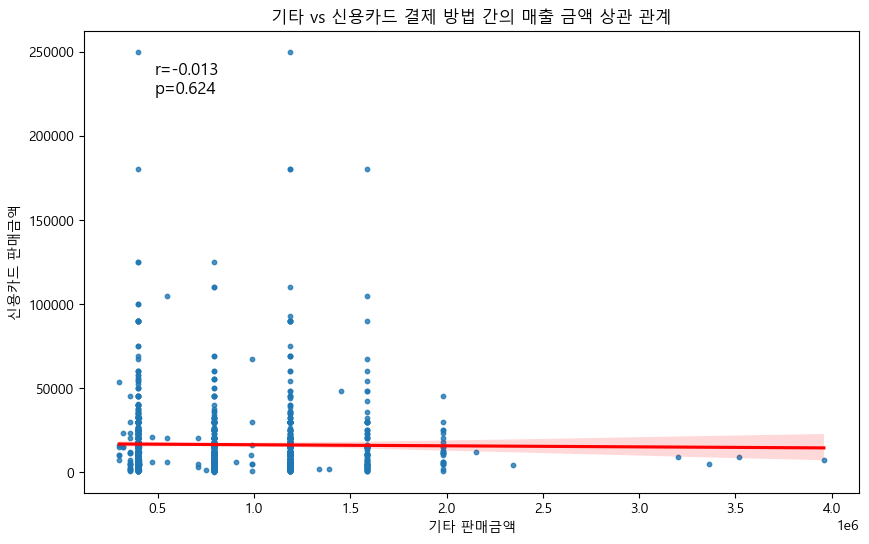

<Figure size 640x480 with 0 Axes>

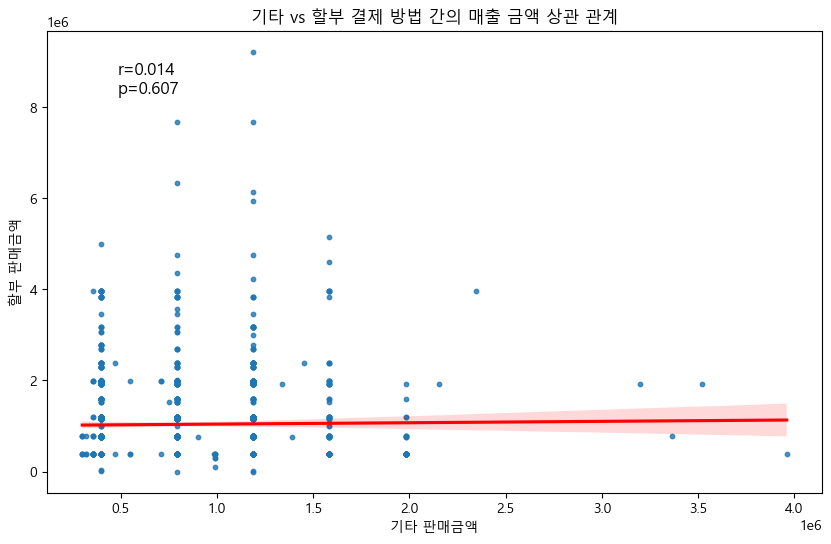

<Figure size 640x480 with 0 Axes>

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 데이터프레임의 컬럼명 확인
print(df6.columns)

# 결제 방법을 숫자로 변환 (더미 변수 사용)
df8 = pd.get_dummies(df6, columns=['결제방법'], drop_first=False)

# 결제 방법 간의 쌍에 대해 회귀선 플롯을 그리는 함수
def plot_regression(data, method1, method2, title):
    x_data = data[data[f'결제방법_{method1}'] == 1]['판매금액']
    y_data = data[data[f'결제방법_{method2}'] == 1]['판매금액']
    
    min_len = min(len(x_data), len(y_data))
    x_data = x_data.head(min_len)
    y_data = y_data.head(min_len)
    
    r, p = stats.pearsonr(x_data, y_data)
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x_data, y=y_data, scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(title)
    plt.xlabel(f'{method1} 판매금액')
    plt.ylabel(f'{method2} 판매금액')
    plt.text(min(x_data) + 0.05 * (max(x_data) - min(x_data)), max(y_data) * 0.9, f'r={r:.3f}\np={p:.3f}', fontsize=12)
    plt.show()

# 결제 방법 간의 쌍에 대해 회귀선 플롯 생성
combinations = [
    ('현금', '신용카드'),
    ('현금', '할부'),
    ('현금', '마일리지'),
    ('현금', '기타'),
    ('할부', '마일리지'),
    ('할부', '신용카드'),
    ('마일리지', '신용카드'),
    ('마일리지', '기타'),
    ('기타', '신용카드'),
    ('기타', '할부')
]

for method1, method2 in combinations:
    if f'결제방법_{method1}' in df8.columns and f'결제방법_{method2}' in df8.columns:
        title = f'{method1} vs {method2} 결제 방법 간의 매출 금액 상관 관계'
        plot_regression(df8, method1, method2, title)
        plt.savefig(f'{method1} vs {method2} 결제 방법 간의 매출 금액 상관 관계.png')


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


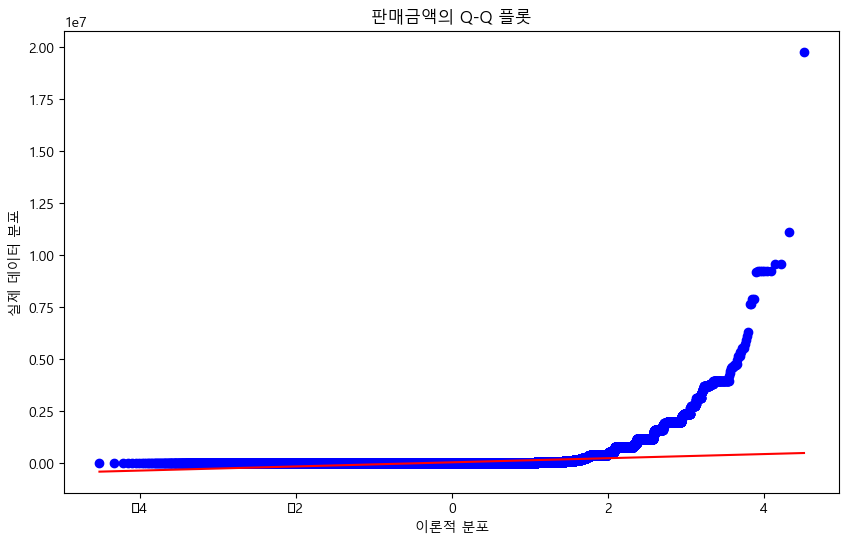

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q 플롯을 그리는 함수
def plot_qq(data, column):
    plt.figure(figsize=(10, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'{column}의 Q-Q 플롯')
    plt.xlabel('이론적 분포')
    plt.ylabel('실제 데이터 분포')
    plt.show()

# 판매금액에 대한 Q-Q 플롯
plot_qq(df8, '판매금액')


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스피어만 상관계수 계산
corr = df8.corr(method='spearman')

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('스피어만 상관계수 히트맵')
plt.show()


ValueError: could not convert string to float: '지니'

In [ ]:
sns.pairplot(df8, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s': 10}})
plt.suptitle('결제 방법과 판매금액 간의 페어 플롯', y=1.02)
plt.show()


In [ ]:
plt.matshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('스피어만 상관계수 행렬 플롯', pad=20)
plt.show()


In [34]:
import pandas as pd
import scipy.stats as stats

# 예제 데이터프레임 준비
# df8 데이터프레임이 이미 존재한다고 가정합니다.

# 스피어만 상관분석을 수행하는 함수
def spearman_corr(data, col1, col2):
    corr, p_value = stats.spearmanr(data[col1], data[col2])
    print(f'{col1}와 {col2} 간의 스피어만 상관계수: {corr:.3f}')
    print(f'p-값: {p_value:.3f}')

# 결제 방법과 판매금액 간의 스피어만 상관분석 수행
payment_methods = ['현금', '신용카드', '할부', '마일리지', '기타']
for method in payment_methods:
    col_name = f'결제방법_{method}'
    if col_name in df8.columns:
        spearman_corr(df8, col_name, '판매금액')


결제방법_현금와 판매금액 간의 스피어만 상관계수: 0.005
p-값: 0.018
결제방법_신용카드와 판매금액 간의 스피어만 상관계수: 0.025
p-값: 0.000
결제방법_할부와 판매금액 간의 스피어만 상관계수: 0.157
p-값: 0.000
결제방법_마일리지와 판매금액 간의 스피어만 상관계수: -0.093
p-값: 0.000
결제방법_기타와 판매금액 간의 스피어만 상관계수: 0.132
p-값: 0.000


In [37]:
import pandas as pd
import scipy.stats as stats

# df8 데이터프레임이 이미 존재한다고 가정합니다.

# 샤피로-윌크 검정 수행
stat, p = stats.shapiro(df8['판매금액'])

print('샤피로-윌크 검정 통계량:', stat)
print('p-값:', p)

if p < 0.05:
    print('판매금액 데이터는 정규분포를 따르지 않습니다.')
else:
    print('판매금액 데이터는 정규분포를 따릅니다.')


샤피로-윌크 검정 통계량: 0.20136231184005737
p-값: 0.0
판매금액 데이터는 정규분포를 따르지 않습니다.


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
